In [3]:
#1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt




In [4]:
#2
df = pd.read_csv('Datasets.csv')

In [5]:
#3
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0  step      type     branch    amount     nameOrig  \
0           0     1   PAYMENT  Indonesia   9839.64  C1231006815   
1           1     1   PAYMENT      India   1864.28  C1666544295   
2           2     1  TRANSFER      India    181.00  C1305486145   
3           3     1  CASH_OUT  Australia    181.00   C840083671   
4           4     1   PAYMENT  Australia  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0       170136.0       160296.36  M1979787155             0.0             0.0   
1        21249.0        19384.72  M2044282225             0.0             0.0   
2          181.0            0.00   C553264065             0.0             0.0   
3          181.0            0.00    C38997010         21182.0             0.0   
4        41554.0        29885.86  M1230701703             0.0             0.0   

   unusuallogin  isFlaggedFraud Acct type Date of transaction Time of day  \
0             9               0  

In [6]:
#4
print(df.isnull().sum())

df = df.dropna()  

Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64


In [7]:
#5
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['type', 'branch', 'Acct type', 'Time of day']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  
print(df.head())


   Unnamed: 0  step  type  branch    amount     nameOrig  oldbalanceOrg  \
0           0     1     3      55   9839.64  C1231006815       170136.0   
1           1     1     3      54   1864.28  C1666544295        21249.0   
2           2     1     4      54    181.00  C1305486145          181.0   
3           3     1     1       7    181.00   C840083671          181.0   
4           4     1     3       7  11668.14  C2048537720        41554.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0       160296.36  M1979787155             0.0             0.0             9   
1        19384.72  M2044282225             0.0             0.0            10   
2            0.00   C553264065             0.0             0.0             2   
3            0.00    C38997010         21182.0             0.0             1   
4        29885.86  M1230701703             0.0             0.0            17   

   isFlaggedFraud  Acct type Date of transaction  Time of day  isFra

In [8]:
#6
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'Date of transaction'])
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])


[[-1.73803671 -1.29698612  0.58800906  0.10970202 -0.35111267 -0.33679015
  -0.34392703 -0.34858628 -0.36380185 -0.26082981  0.         -1.49547494
   0.0403231 ]
 [-1.73769398 -1.29698612  0.58800906  0.07975792 -0.38054194 -0.40676495
  -0.40876287 -0.34858628 -0.36380185 -0.0886951   0.          0.66868389
   0.0403231 ]
 [-1.73735125 -1.29698612  1.33745131  0.07975792 -0.38675328 -0.41666662
  -0.41768211 -0.34858628 -0.36380185 -1.46577274  0.         -1.49547494
   0.0403231 ]
 [-1.73700852 -1.29698612 -0.91087544 -1.32761463 -0.38675328 -0.41666662
  -0.41768211 -0.34068509 -0.36380185 -1.63790744  0.         -1.49547494
  -1.1703299 ]
 [-1.73666579 -1.29698612  0.58800906 -1.32761463 -0.34436546 -0.39722189
  -0.40393111 -0.34858628 -0.36380185  1.11624783  0.         -1.49547494
   0.0403231 ]]


In [9]:
#7
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8070, 13)
Testing set size: (2018, 13)


In [10]:
#8
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
#9
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.1887 - val_accuracy: 0.9950 - val_loss: 0.0325
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0438 - val_accuracy: 0.9950 - val_loss: 0.0327
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0452 - val_accuracy: 0.9950 - val_loss: 0.0301
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0313 - val_accuracy: 0.9950 - val_loss: 0.0297
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0338 - val_accuracy: 0.9950 - val_loss: 0.0290
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0292 - val_accuracy: 0.9950 - val_loss: 0.0286
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0319 - val_accuracy: 0.9950 - val_loss: 0.0280
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0299 - val_accuracy: 0.

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix for MLP Model:
[[2005    0]
 [  13    0]]
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
ROC-AUC Score for MLP Model: 0.7207366199884903


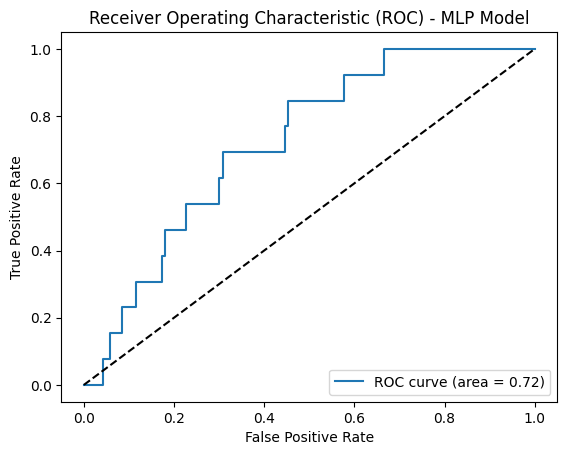

In [12]:
#10
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

y_pred_mlp = model.predict(X_test)
y_pred_mlp = (y_pred_mlp > 0.5).astype(int) 
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix for MLP Model:")
print(conf_matrix_mlp)

y_pred_mlp_proba = model.predict(X_test).flatten()
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_proba)
print("ROC-AUC Score for MLP Model:", roc_auc_mlp)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp_proba)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f"ROC curve (area = {roc_auc_mlp:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MLP Model')
plt.legend(loc="lower right")
plt.show()



In [13]:
############################################
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [14]:
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9935579781962339
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2005
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      2018
   macro avg       0.50      0.50      0.50      2018
weighted avg       0.99      0.99      0.99      2018



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.7879088206144698
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      2005
         1.0       0.02      0.69      0.04        13

    accuracy                           0.79      2018
   macro avg       0.51      0.74      0.46      2018
weighted avg       0.99      0.79      0.88      2018

Confusion Matrix for SVM Model:
[[1581  424]
 [   4    9]]
ROC-AUC Score for SVM Model: 0.7404181853059658


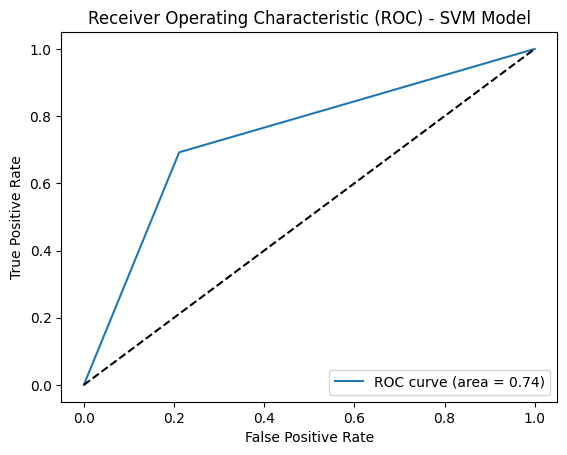

In [20]:
# Initialize and train SVM model with class weights
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM Model:")
print(conf_matrix_svm)

y_pred_svm_proba = svm_model.predict(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
print("ROC-AUC Score for SVM Model:", roc_auc_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f"ROC curve (area = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM Model')
plt.legend(loc="lower right")
plt.show()



64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
Hybrid Model Accuracy: 0.9935579781962339
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2005
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      2018
   macro avg       0.50      0.50      0.50      2018
weighted avg       0.99      0.99      0.99      2018

Confusion Matrix:
[[2005    0]
 [  13    0]]
Hybrid ROC-AUC Score: 0.7772875503548822


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


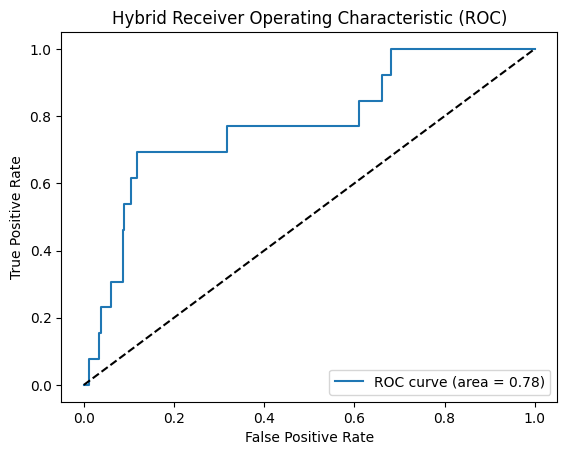

In [16]:
y_pred_mlp_proba = model.predict(X_test).flatten()
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

svm_weight = 0.8
# weight_mlp = 0.4  
# weight_svm = 0.6   

# combined_proba = (weight_mlp * y_pred_mlp_proba + weight_svm * y_pred_svm_proba) / (weight_mlp + weight_svm)
combined_proba = (svm_weight * y_pred_svm_proba + (1 - svm_weight) * y_pred_mlp_proba)
y_pred_combined = (combined_proba > 0.5).astype(int)

print("Hybrid Model Accuracy:", accuracy_score(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))

conf_matrix_combined = confusion_matrix(y_test, y_pred_combined)
print("Confusion Matrix:")
print(conf_matrix_combined)

roc_auc_combined = roc_auc_score(y_test, combined_proba)
print("Hybrid ROC-AUC Score:", roc_auc_combined)

fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test, combined_proba)
plt.figure()
plt.plot(fpr_combined, tpr_combined, label=f"ROC curve (area = {roc_auc_combined:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
############################################


In [17]:
#13
y_pred_mlp_proba = model.predict(X_test).flatten()
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

combined_proba = (y_pred_mlp_proba + y_pred_svm_proba) / 2
y_pred_combined = (combined_proba > 0.5).astype(int)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
#14
print("Hybrid Model Accuracy:", accuracy_score(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))

Hybrid Model Accuracy: 0.9935579781962339
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2005
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      2018
   macro avg       0.50      0.50      0.50      2018
weighted avg       0.99      0.99      0.99      2018



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
